<a href="https://colab.research.google.com/github/MaryamNourii/EmotionDetection/blob/Prepare-Data-and-Clean/EmotionDetection_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install libwapiti parsivar
!pip install hazm
!pip3 install wordcloud-fa
!pip install nltk

In [ ]:
import re
import pandas as pd
import numpy as np
import string

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
colors = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(colors))
matplotlib.rcParams['figure.figsize'] = 12, 8

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


import nltk
from nltk import *
from nltk.util import ngrams

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud_fa import WordCloudFa

import hazm
import parsivar

In [ ]:
nltk.download('punkt')

In [ ]:
test = pd.read_csv('armanTest.tsv', sep='\t')
train = pd.read_csv('armanTrain.tsv', sep='\t')
df1 = pd.concat([train, test])
df1 = df1.drop_duplicates()
df1

In [ ]:
df = pd.read_csv('EmoPars.csv', sep=',')
df = df.drop_duplicates()
new_df = df.drop(columns=['text'])
df['max'] = new_df.max(axis=1)
df['label'] = new_df.idxmax(axis=1)
df.loc[df['max'] < 3, 'label'] = "OTHER"
df['label'].replace({'Sadness':'SAD', 'Hatred':'HATE', 'Fear':'FEAR', 'Anger':'ANGRY', 'Happiness':'HAPPY', 'Wonder':'SURPRISE'}, inplace=True)
new_df = df[['text', 'label']].reset_index(drop=True)
new_df

In [ ]:
concat_df = pd.concat([new_df, df1])
max  = concat_df.groupby(["label"]).count().sort_values('text')['text'][-2]
OTHER = concat_df[concat_df['label'] == 'OTHER'].sample(n = max, replace = False).reset_index(drop=True)
final_df = concat_df[concat_df['label'] != 'OTHER']
final_df = pd.concat([final_df, OTHER])
np.random.shuffle(final_df.values)
final_df.to_csv('FinalData.csv', index=False)
final_df

In [ ]:
final_df.head(10)

,text,label
0,واااييي خدااا تو خيلي خوبي??شفا نگيري الهي ك ...,HAPPY
1,هر ایرانی یک... ``کاش من ایرانی نبودم``\n\nAg...,ANGRY
2,تروخدا مسخرمون نکن، ما الان جنبه شوخی نداریم,SAD
4,وای منم خیلی میترسم,FEAR
5,الان برام سواله این هشتگ خشونت تحصیلی که قراره...,SAD
6,نمیخورییییی؟ چطور میتونی گوشت نخوری رضا,SURPRISE
9,انقدی که بچه‌های کلاسمون تو گروه در مورد نحوه ...,OTHER
11,از وقتی قالیباف رفت دیگه از بانک شهر بدم میاد,HATE
12,به خدا اصلا براشون حجاب مهم نیست از گیر دادن ل...,HATE
15,مگه انیمیشن ۴بعدی هم داریم,SURPRISE


In [ ]:
final_df[final_df['text'].isnull()]

In [ ]:
final_df['label'].value_counts(normalize=True)

OTHER       0.187025
ANGRY       0.187025
SAD         0.184467
SURPRISE    0.116606
HATE        0.115611
HAPPY       0.108506
FEAR        0.100760
Name: label, dtype: float64

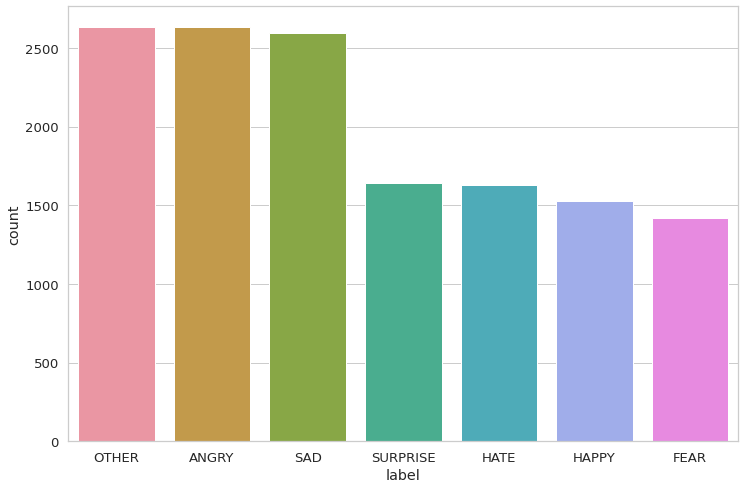

In [ ]:
sns.countplot(final_df['label'],order = final_df['label'].value_counts(normalize=True).index)

In [ ]:
final_df['text_length'] = final_df['text'].astype(str).apply(len)
final_df['text_word_count'] = final_df['text'].apply(lambda x: len(str(x).split()))

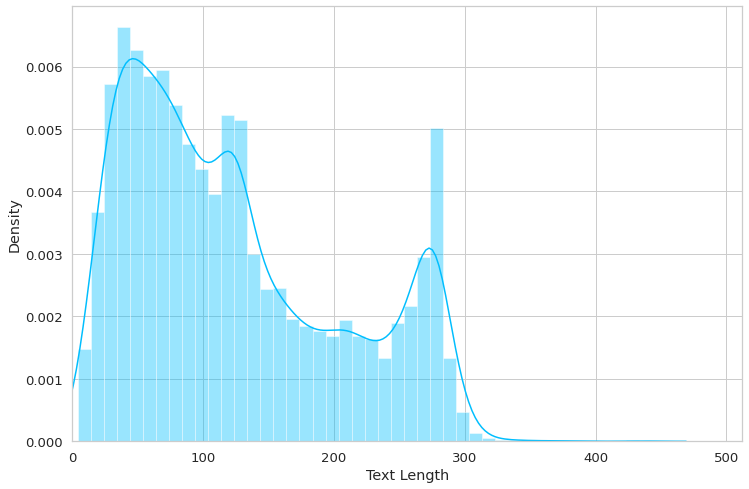

In [ ]:
sns.distplot(final_df['text_length'])
plt.xlim([0, 512]);
plt.xlabel('Text Length');

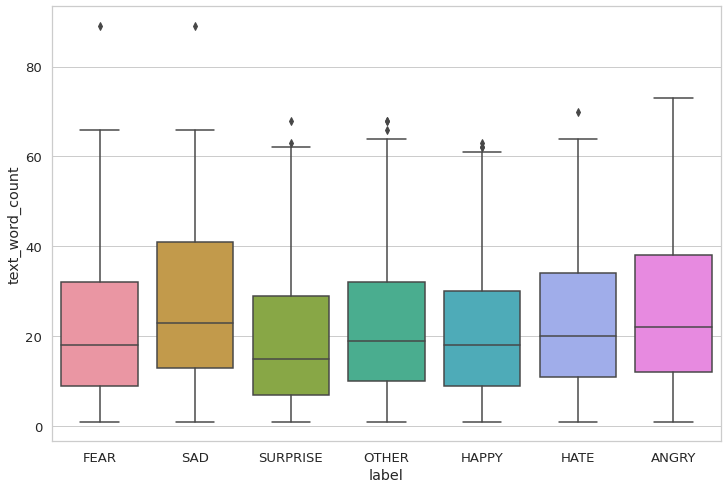

In [ ]:
sns.boxplot(x="label", y="text_word_count", data=final_df)

In [ ]:
def text_normalizer(text):

    tokens = nltk.word_tokenize(text)
    newfile=''
    for word in tokens:
        word = word.replace(" ", "").replace("\u200c", "").replace("=", "= ").upper().replace("+", "+ ").upper().replace("^", "^ ").upper().replace("/", "/ ").upper().replace("-", "- ").upper().replace(")", ") ").upper().replace(".", ". ").upper().replace("!", "! ").upper().replace("؟", "؟ ").upper().replace("\ufeff\n","").lower().replace(
            "،", "، ").upper().replace("*", "* ").upper().replace("٪", "٪ ").upper().replace('ة' , 'ه').replace('ي', 'ی').replace("؛" , '؛ ').upper().replace("!" , ' !').lower().replace("؛" , ' ؛').lower().replace("." , ' .').lower().replace("؟" , " ؟").lower().replace(
            "،", " ،").lower().replace(")", " )").lower().replace("^", " ^").lower().replace("=", " =").lower().replace("+", " +").lower().replace("*", " *").lower().replace("-", " -").upper().replace("/", " /").lower().replace("٪", " ٪").lower().replace('\xa0','').replace('ک' , 'ك').replace('\d+', '').replace('#', '').replace('_', '').replace('@', '').replace('username', '').replace('پ' , 'ب')
        newfile = newfile + ' ' + word

    return newfile

def remove_emojis( text):

    emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)    
    return emoji_pattern.sub(r'', text)

def remove_english_words( text):
    return re.sub(r'[A-Za-z]+', '' , text)

def remove_hashtags( text):
    text = re.sub(r"#[A-Za-z0-9_]+","", text)
    text = re.sub(r"#[\u06F0-\u06F9\u0660-\u0669\u0621-\u0628\u062A-\u063A\u0641-\u0642\u0644-\u0648\u064E-\u0651\u0655\u067E\u0686\u0698\u06A9\u06AF\u06BE\u06CC_]+","", text)
    return text

def remove_numbers( text):
    for i, j in zip('۱۲۳۴۵۶۷۸۹۰', '1234567890'):
      text = text.replace(i, j)
    for i, j in zip('۱۲۳٤٥٦۷۸۹۰', '1234567890'):
      text = text.replace(i, j)
    return re.sub(r"[0-9]+","", text)

def remove_mentions( text):
    return re.sub(r"@[A-Za-z0-9_]+","", text)

def sentence_tokenize( text):
    pattern = re.compile(r'[.!؟؛?\n][ ]*')
    return pattern.split(text)

def word_tokenize( sentence):
    return re.findall(r"[\w']+", sentence)

def remove_Stopword(text):
    file = nltk.word_tokenize(text)
    newFile=''
    stopWord=[]
    fin=open('stopword.txt',encoding='utf8')

    for word in fin.readlines():
        stopWord.append(word.replace('\n', '').lower().replace('\ufeff', '').lower().replace('\ufeff', '').upper().replace(" " ,""))

    for word in file:
        word=word.replace(' ', '')
        if word in stopWord:
            continue
        else:
            newFile = newFile + ' ' + word


    return newFile

def remove_url( text):
    text =  re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    return text

def remove_character_duplications(text):
    words = nltk.word_tokenize(text)  
    new_words = ''
    for word in words:
      word = re.sub(r'(.)\1\1+', r'\1', word)
      new_words = new_words + ' ' + word
    return new_words



def get_top_n_gram(corpus,ngram_range,n=None):
    vec= None
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
final_df['text_normalized'] = final_df['text'].apply(lambda t: text_normalizer(t))
final_df['rmv_stp_wrd'] =final_df['text_normalized'].apply(lambda t:remove_Stopword(t))
final_df['rmv_emj_wrd'] =final_df['rmv_stp_wrd'].apply(lambda t:remove_emojis(t))
final_df['remove_numbers'] =final_df['rmv_emj_wrd'].apply(lambda t:remove_numbers(t))
final_df['rmv_eng_wrd'] =final_df['remove_numbers'].apply(lambda t:remove_english_words(t))
final_df['rmv_hshtag'] =final_df['rmv_eng_wrd'].apply(lambda t:remove_hashtags(t))
final_df['rmv_mnt'] =final_df['rmv_hshtag'].apply(lambda t:remove_mentions(t))
final_df['rmv_url'] =final_df['rmv_mnt'].apply(lambda t:remove_url(t))
final_df['rmv_chr_dplct'] =final_df['rmv_url'].apply(lambda t:remove_character_duplications(t))

In [ ]:
final_df['cleaned_data'] = final_df['rmv_chr_dplct']
clean_df = final_df[['cleaned_data', 'label']].reset_index(drop=True)
clean_df.rename(columns = {'cleaned_data':'text'}, inplace = True)
clean_df[clean_df['text'].isnull()]

In [ ]:
null_val = clean_df[clean_df['text']=='']
null_val

In [ ]:
clean_df=clean_df.drop(null_val.index)
clean_df[clean_df['text']=='']

In [ ]:
clean_df.to_csv('CleanData.csv', index=False)
clean_df

,text,label
0,واقع هیچكس دوست كسی بهش علاقه ترسی ترس دقیقا ...,FEAR
1,اعتصاب غذایش همراه دوستان روزنامهنگار فعال حو...,SAD
2,راست میگه بنده خدا آخه جملات پر فیضی دانشگاهی...,SURPRISE
3,قضا بحث آدمی بدیهیات قانون پایبند میره نهاد ق...,SAD
4,بابا الكی حرف زدم توییت فاخر زعم خودم نوشتم ش...,OTHER
...,...,...
14068,هشتگهای داغ ساعت اردشیرزاهدی كرونا جاویدشاه پ...,OTHER
14069,عكس نیروی هوایی آیت الله علم الهدى توضیحی نوش...,OTHER
14070,واقعا آب برق مجانی نخواستیم لااقل دست سفر نكنید,SAD
14071,زودتر شرایط دختر شجاعمون خبر بشیم دستگیر كمك ...,HATE


In [ ]:
col = 'cleaned_data'
sadness = final_df[final_df['label']=='SAD'][col]
happy = final_df[final_df['label']=='HAPPY'][col]
angry = final_df[final_df['label']=='ANGRY'][col]
surprise = final_df[final_df['label']=='SURPRISE'][col]
fear = final_df[final_df['label']=='FEAR'][col]
hate = final_df[final_df['label']=='HATE'][col]
other = final_df[final_df['label']=='OTHER'][col]

In [ ]:
sad_unigrams = get_top_n_gram(sadness.values,(1,1),7)[2:]
happy_unigrams= get_top_n_gram(happy.values,(1,1),7)[2:]
angry_unigrams= get_top_n_gram(angry.values,(1,1),7)[2:]
surprise_unigrams= get_top_n_gram(surprise.values,(1,1),7)[2:]
fear_unigrams= get_top_n_gram(fear.values,(1,1),7)[2:]
hate_unigrams= get_top_n_gram(hate.values,(1,1),7)[2:]
other_unigrams= get_top_n_gram(other.values,(1,1),7)[2:]



sad_bigrams = get_top_n_gram(sadness.values,(2,2),7)[2:]
happy_bigrams= get_top_n_gram(happy.values,(2,2),7)[2:]
angry_bigrams= get_top_n_gram(angry.values,(2,2),7)[2:]
surprise_bigrams= get_top_n_gram(surprise.values,(2,2),7)[2:]
fear_bigrams= get_top_n_gram(fear.values,(2,2),7)[2:]
hate_bigrams= get_top_n_gram(hate.values,(1,1),7)[2:]
other_bigrams= get_top_n_gram(other.values,(2,2),7)[2:]


sad_trigrams = get_top_n_gram(sadness.values,(3,3),7)[2:]
happy_trigrams= get_top_n_gram(happy.values,(3,3),7)[2:]
angry_trigrams= get_top_n_gram(angry.values,(3,3),7)[2:]
surprise_trigrams= get_top_n_gram(surprise.values,(3,3),7)[2:]
fear_trigrams= get_top_n_gram(fear.values,(3,3),7)[2:]
hate_trigrams= get_top_n_gram(hate.values,(1,1),7)[2:]
other_trigrams= get_top_n_gram(other.values,(3,3),7)[2:]

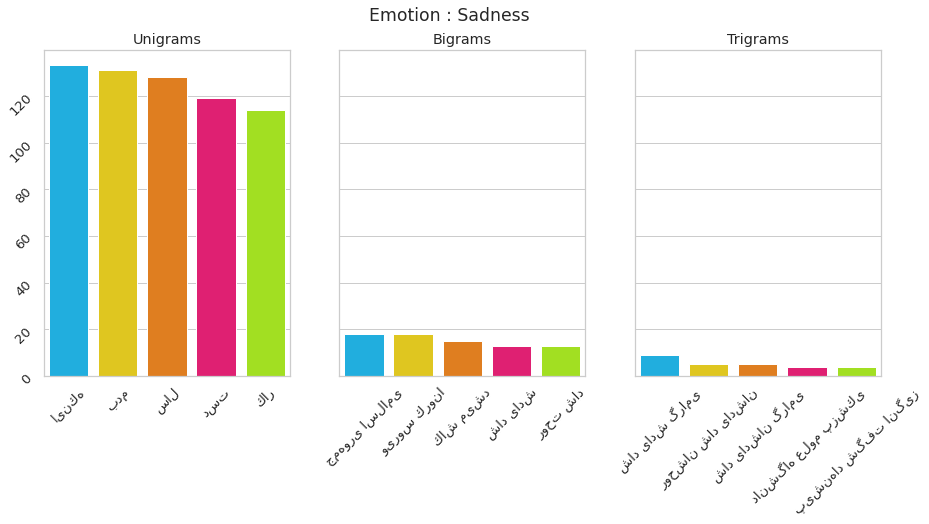

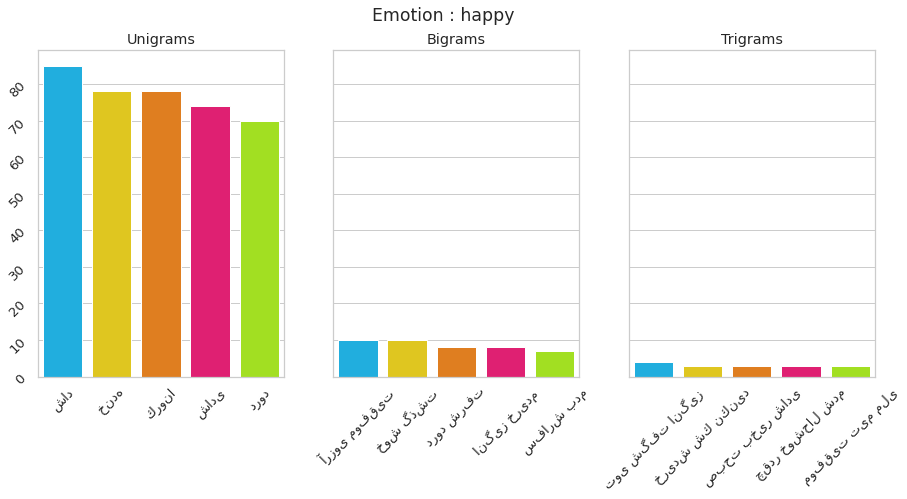

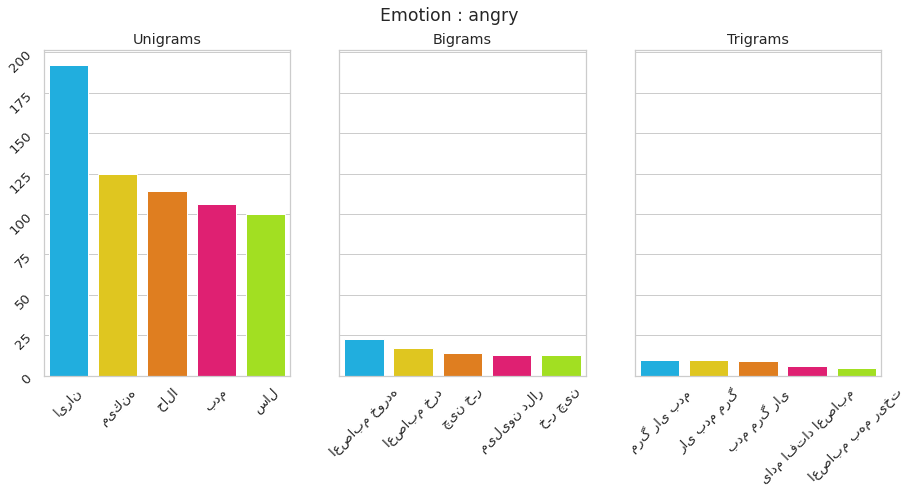

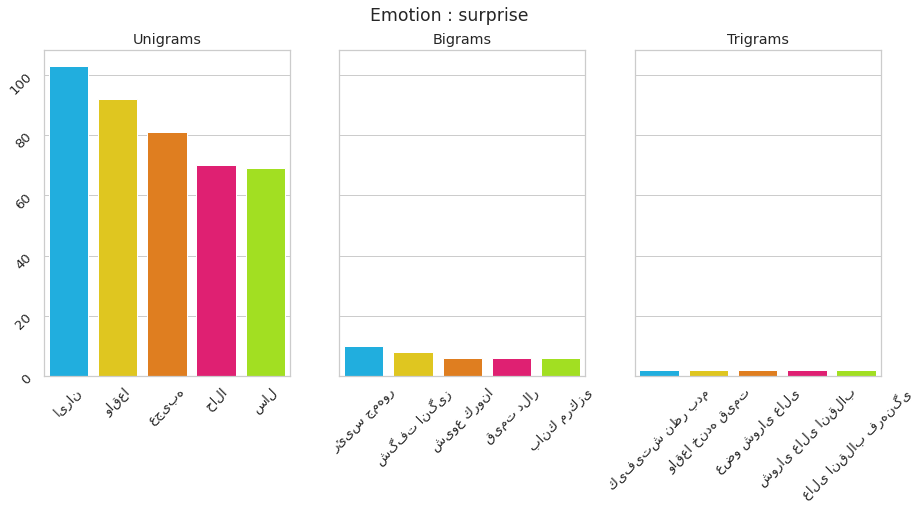

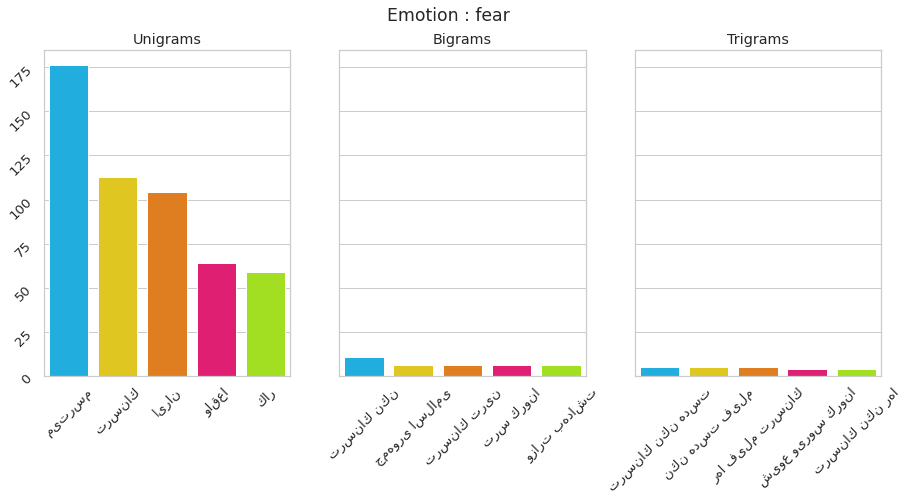

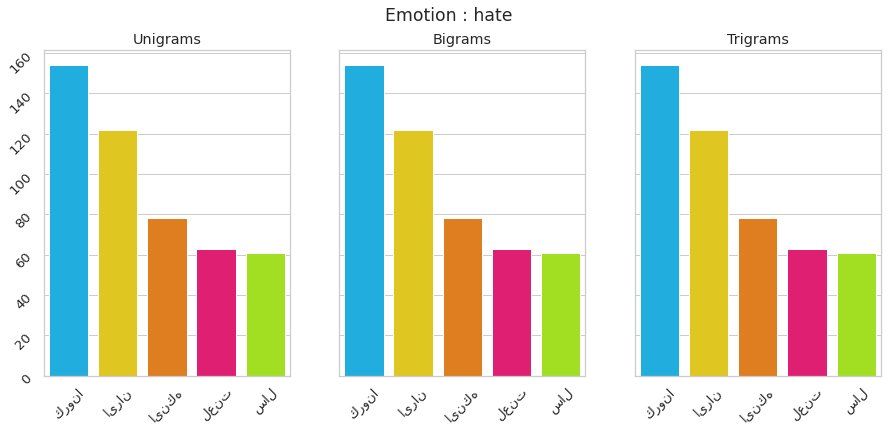

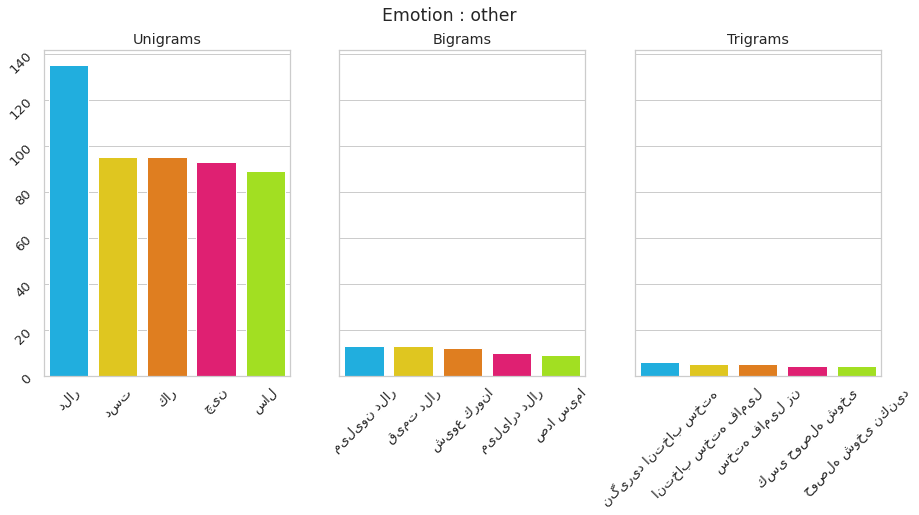

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : Sadness')



sns.barplot( list(dict(sad_unigrams).keys()), list(dict(sad_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_bigrams).keys()), list(dict(sad_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(sad_trigrams).keys()), list(dict(sad_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
# fig.savefig('sadness.png')


#happy

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : happy')

sns.barplot( list(dict(happy_unigrams).keys()), list(dict(happy_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(happy_bigrams).keys()), list(dict(happy_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)


sns.barplot( list(dict(happy_trigrams).keys()), list(dict(happy_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)
# fig.savefig('happy.png')

#angry

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : angry')

sns.barplot( list(dict(angry_unigrams).keys()), list(dict(angry_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(angry_bigrams).keys()), list(dict(angry_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(angry_trigrams).keys()), list(dict(angry_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#surprise
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : surprise')

sns.barplot( list(dict(surprise_unigrams).keys()), list(dict(surprise_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(surprise_bigrams).keys()), list(dict(surprise_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(surprise_trigrams).keys()), list(dict(surprise_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#fear
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : fear')

sns.barplot( list(dict(fear_unigrams).keys()), list(dict(fear_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(fear_bigrams).keys()), list(dict(fear_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(fear_trigrams).keys()), list(dict(fear_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

#hate

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : hate')

sns.barplot( list(dict(hate_unigrams).keys()), list(dict(hate_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(hate_bigrams).keys()), list(dict(hate_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(hate_trigrams).keys()), list(dict(hate_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


#other
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Emotion : other')

sns.barplot( list(dict(other_unigrams).keys()), list(dict(other_unigrams).values()),ax=axes[0],)
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot( list(dict(other_bigrams).keys()), list(dict(other_bigrams).values()),ax=axes[1],)
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)



sns.barplot( list(dict(other_trigrams).keys()), list(dict(other_trigrams).values()),ax=axes[2],)
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

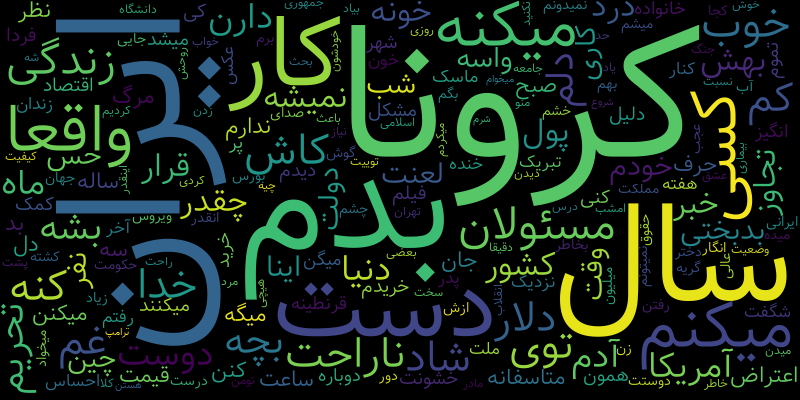

In [ ]:
wodcloud = WordCloudFa(persian_normalize=True, include_numbers=False, collocations=False, width=800, height=400)
text = ' '.join([sntc for sntc in sadness])
wc = wodcloud.generate(text)
wc.to_image()

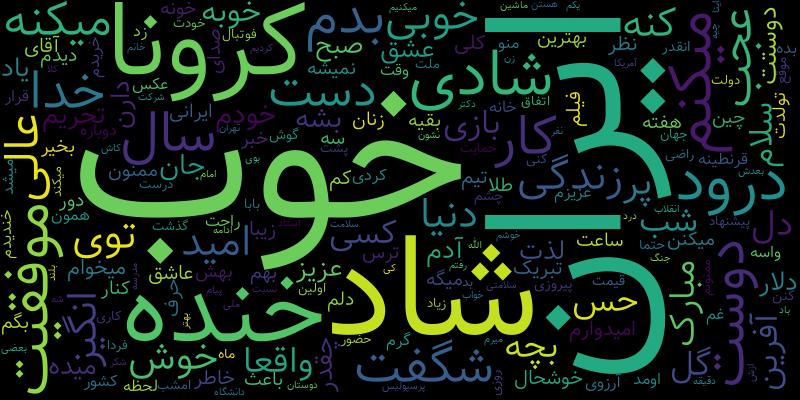

In [ ]:
text = ''
text = ' '.join([sntc for sntc in happy])
wc = wodcloud.generate(text)
wc.to_image()

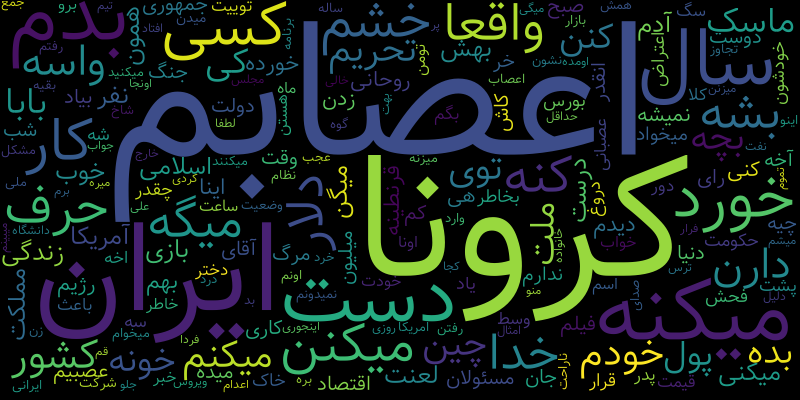

In [ ]:
text = ''
text = ' '.join([sntc for sntc in angry])
wc = wodcloud.generate(text)
wc.to_image()

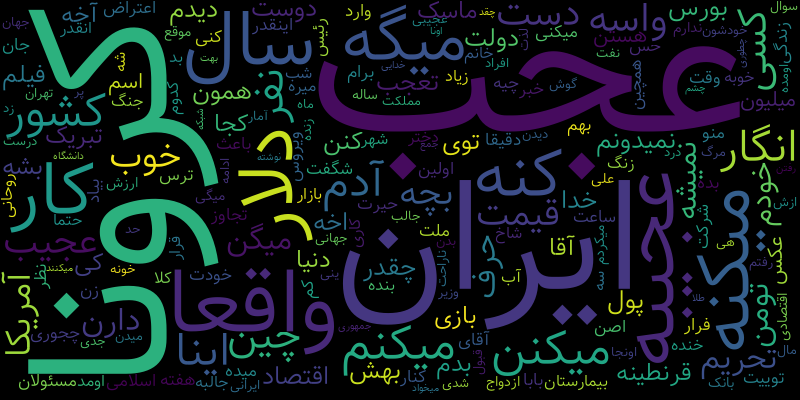

In [ ]:
text = ''
text = ' '.join([sntc for sntc in surprise])
wc = wodcloud.generate(text)
wc.to_image()

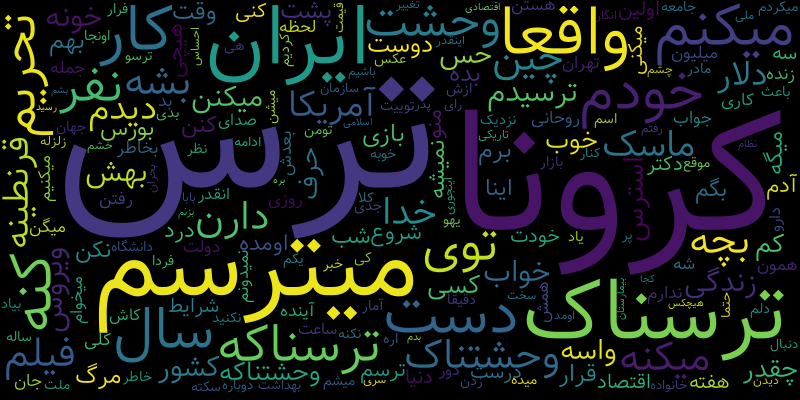

In [ ]:
text = ''
text = ' '.join([sntc for sntc in fear])
wc = wodcloud.generate(text)
wc.to_image()

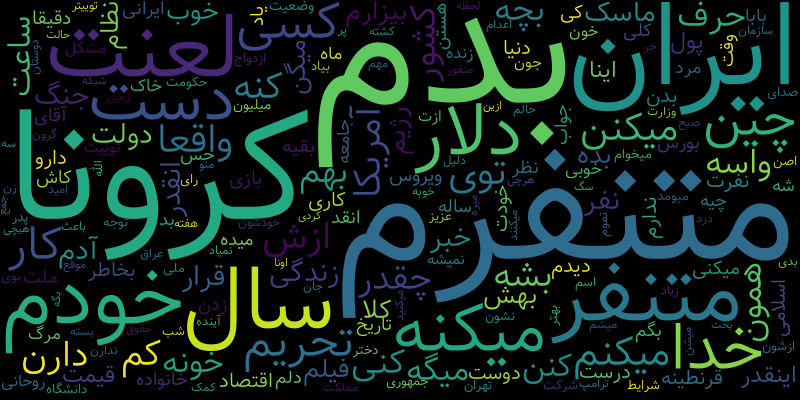

In [ ]:
text = ''
text = ' '.join([sntc for sntc in hate])
wc = wodcloud.generate(text)
wc.to_image()

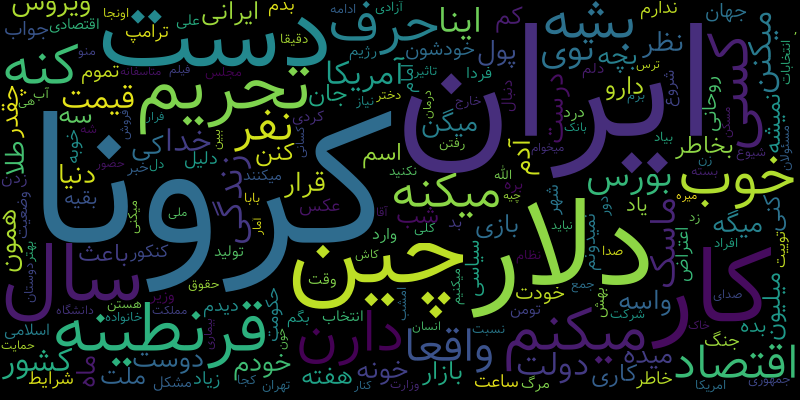

In [ ]:
text = ''
text = ' '.join([sntc for sntc in other])
wc = wodcloud.generate(text)
wc.to_image()